##### Imports

In [2]:
from asvFormula.digraph import *
from asvFormula.classesSizes.algorithmTime import *

from importlib import reload 
from asvFormula.digraph import isPolyforest
import asvFormula
import asvFormula.topoSorts.topoSortsCalc as tp
import asvFormula.topoSorts.toposPositions as pos
import asvFormula.testingFunctions as tst


tp = reload(asvFormula.topoSorts.topoSortsCalc)
pos = reload(asvFormula.topoSorts.toposPositions)
tst = reload(asvFormula.testingFunctions)

#### Debuggin utils

In [34]:
import itertools
import random

def classifyNodesByOrderAndIndexes(parentNodes, union):
    allTopos = list(nx.all_topological_sorts(union))

    permutations = list(itertools.permutations(parentNodes))
    toposPermutations = {}

    for topo in allTopos:
        for perm in permutations:
            indexes = [topo.index(node) for node in perm]
            if  indexes == sorted(indexes):
                key = f'Permutation: {perm}'
                toposPermutations[key] = toposPermutations.get(key, 0) + 1

    return toposPermutations, allTopos

def pathToLeaf(tree : nx.DiGraph, start_node):
    path = [start_node]
    current = start_node
    while not isLeaf(current, tree):
        current = next(tree.successors(current))
        path.append(current)
    return path

def createRandomPolyforest(num_nodes, max_out_degree=3):

    # Step 1: Generate a random digraph
    polyforest = nx.DiGraph()
    polyforest.add_nodes_from(range(num_nodes))
    undirectedPolyForest = polyforest.to_undirected()
    
    # Add random edges with a constraint on out-degree
    for node in range(num_nodes):
        num_edges = random.randint(1, max_out_degree)

        possible_targets = list(set(range(num_nodes)) - {node})
        targets = random.sample(possible_targets, min(num_edges, len(possible_targets)))
        for target in targets:
            if not polyforest.has_edge(target, node) and nx.has_path(undirectedPolyForest,target, node):
                polyforest.add_edge(node, target)
                undirectedPolyForest.add_edge(node, target)

    assert isPolyforest(polyforest)
    return polyforest

## Positions of node in toposorts of tree


In [3]:
numLevels = 3
branchingFactor = 3

treeTest = balancedTree(numLevels, branchingFactor)

middleTree = pathToLeaf(treeTest, 0)
allTopos = list(nx.all_topological_sorts(treeTest))
tst.test_allToposPositions(middleTree, treeTest, allTopos)

# It takes 8 minutes to run. Most of the time is spent calculating all the topological sorts and iterating over them

## Toposorts of a polytree


### Polytree with one intersection


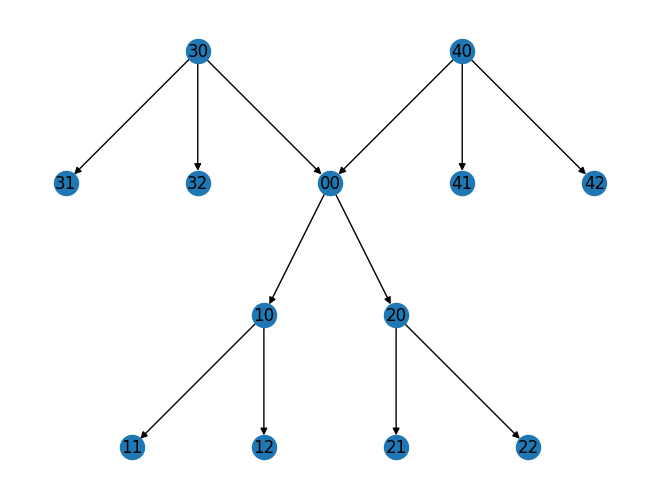

In [4]:
numLevels = 2
branchingFactor = 2
parentsAndChildren = 2

parentTrees = [balancedTree(numLevels, branchingFactor) for _ in range(parentsAndChildren)]
childTrees = [balancedTree(numLevels, branchingFactor) for _ in range(parentsAndChildren)]
middleTree = balancedTree(1, 1)

mapping = {node: f"0{node}" for node in middleTree.nodes()}
union = nx.relabel_nodes(middleTree, mapping)

allTrees = parentTrees + childTrees

for i in range(len(allTrees)):
    union = nx.union(union, allTrees[i], rename=('', str(i+1)))

#Connect the trees to the middle one
for i in range(parentsAndChildren):
    union.add_edge(f"0{0}", f"{i+1}0")
    union.add_edge(f"{len(allTrees)-i}0", f"0{0}")
drawGraph(union)
#tst.test_allPolyTopos(union, '00')


#### Leafs to root


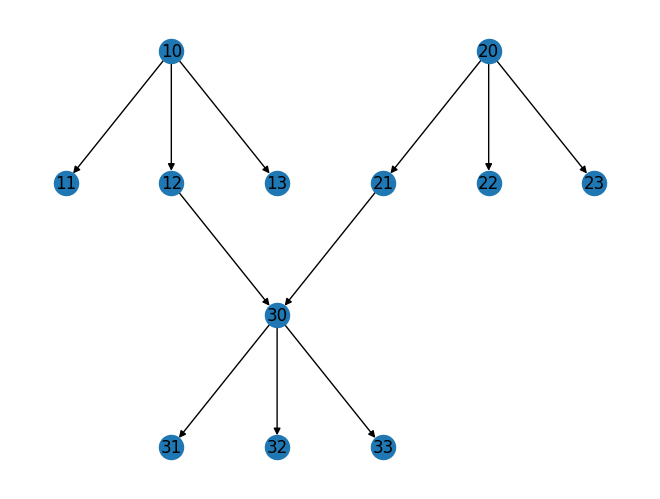

In [2]:
numLevels = 2
branchingFactor = 3

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1', '2'))
union = nx.union(union, middleTree, rename=('', '3'))

#Connect the trees to the middle one
union.add_edge('12', '30')
union.add_edge('21', '30')
drawGraph(union)
tst.test_allPolyTopos(union)


#### Nodes to leaf


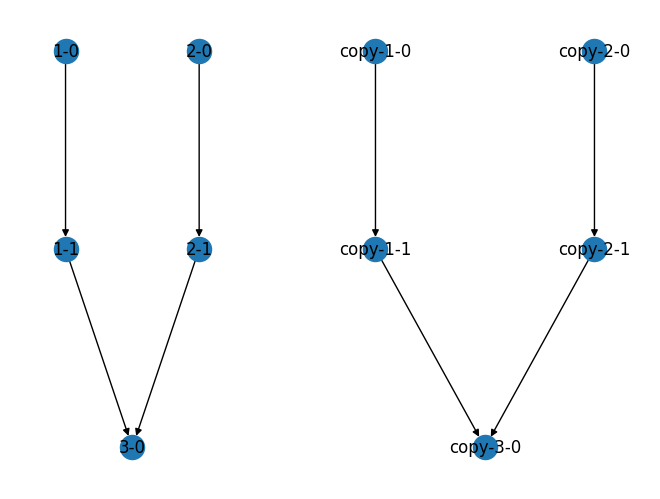

In [3]:
numLevels = 2
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(1, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-1', '3-0')
union.add_edge('2-1', '3-0')
union = nx.union(union, union, rename=('', 'copy-'))
drawGraph(union)
#classifications, allTopos = classifyNodesByOrderAndIndexes(['12', '21', '31', '33'], union)
#print(classifications)
tst.test_allPolyTopos(union)



#### Nodes to nodes


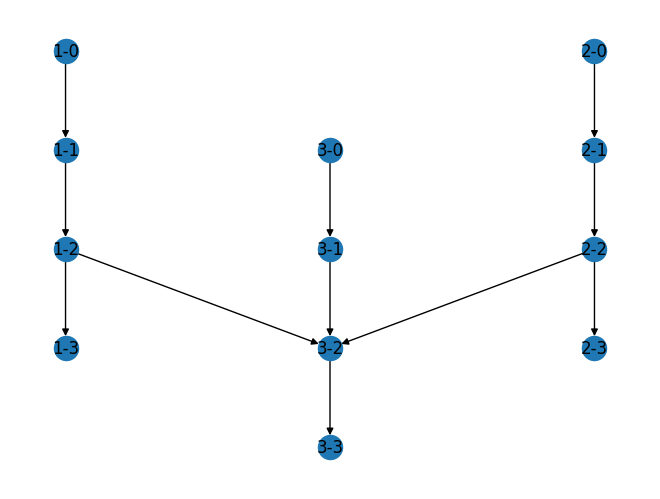

In [4]:
numLevels = 4
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-2')
union.add_edge('2-2', '3-2')
drawGraph(union)
tst.test_allPolyTopos(union)


### Polytree with two intersections


#### Intersection with more than 2 parents


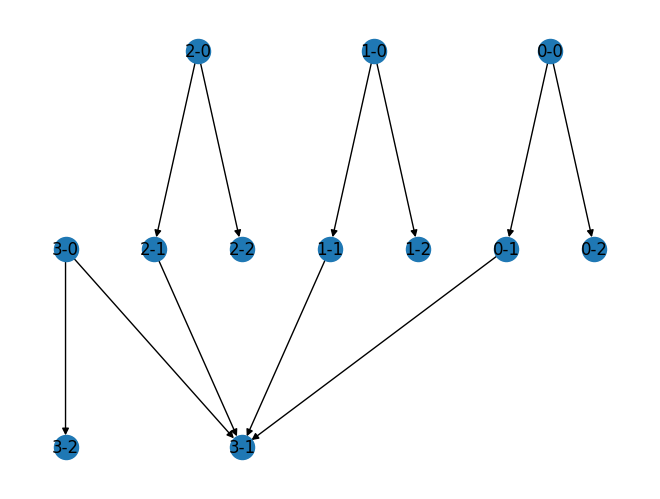

In [5]:
numLevels = 2
branchingFactor = 2
parents = 4

union = nx.DiGraph()
for i in range(parents):
    tree = balancedTree(numLevels, branchingFactor)
    union = nx.union(tree, union, rename=(f'{i}-', ''))

for i in range(parents-1):
    union.add_edge(f'{i}-1', f'{parents-1}-1')
drawGraph(union)
tst.test_allPolyTopos(union)

#It takes 28 seconds to run. Most of the time is spent calculating all the topological sorts and iterating over them


#### Nodes to nodes


In [9]:
numLevels = 4
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-2')
union.add_edge('2-2', '3-2')
#drawGraph(union)
tst.test_allPolyTopos(union)


### Random polytree generation and testing


In [35]:
succeses = 0
for nodes in range(1,15):
    for degree in range(1, 12):
        polyforest = createRandomPolyforest(num_nodes=nodes, max_out_degree=degree)
        if tp.allPolyTopoSorts(polyforest) < 10**5:
            tst.test_allPolyTopos(polyforest)
            succeses += 1
        if succeses % 20 == 0:
            print(f'Successes : {succeses} for {nodes} nodes and {degree} degree')



Successes : 20 for 2 nodes and 9 degree
Successes : 40 for 4 nodes and 7 degree
Successes : 60 for 6 nodes and 5 degree
Successes : 80 for 8 nodes and 3 degree
